# Simulaciones en R

**Simular** es repetir el experimento muchas veces y calcular la frecuencia relativa del evento.

Por la **Ley de los Grandes Números**, la frecuencia relativa para $n$ repeticiones converge a la probabilidad que queremos calcular.


- **Calcular la probabilidad de que  al tirar dos dados la suma me de par.**

<img src="dice.jpg" width=200 height=200 />


$\Omega = \{(d_1, d_2): d_i \in \{1,2,3,4,5,6\}\}$

$E=\{(d_1, d_2)\in \Omega: d_1+d_2 \equiv 0 \mod(2)\}$

In [1]:
#Simulando
set.seed(1234)
n_rep = 1000
mean(replicate(n_rep, sum(sample(6, 2, replace = TRUE))%%2==0))

[1] 0.496

Simular NO es calcular con la computadora por fuerza bruta casos favorables/casos totales

In [2]:
#Fuerza bruta
casos_totales = 0
casos_favorables = 0

for (dado1 in 1:6)
{
    for (dado2 in 1:6)
    {
        casos_totales = casos_totales +1
        if ((dado1 + dado2)%%2==0)
        {
            casos_favorables = casos_favorables + 1
        }
    }
}

casos_favorables/casos_totales

[1] 0.5

## I choo-choose you

<img src="choose_rafa.jpg" width=300 height=200 />


- **Un   grupo   de   $n$   personas   juega   al   amigo   invisible:   se colocan   los   nombres   de   cada   integrante   en   papeles   y   se sortea   a   cada   integrante   un   papel.   ¿Cuál   es   laprobabilidad   de   que   nadie   haya   recibido   el   papel   con   su propio   nombre?**

In [3]:
n<-30
sample(1:n)

[1]  4  6 18 17  2 28 25  1 27  8 23 24 15 30  7 29 22 10  9 14 12 21 13 20 16
[26]  5 26 19 11  3

In [4]:
fixed_points <- function(vector)
{
    fixed_points = 0
    for (i in 1:length(vector))
    {
        if (vector[i]==i)
            {
            fixed_points <- fixed_points +  1
            }
    }
    return (fixed_points)
}

In [6]:
set.seed(1234)

for (n_rep in c(10, 100, 500, 1000, 5000, 10000, 50000, 100000, 500000))
{
    print(mean(replicate(n_rep, fixed_points(sample(1:n))==0)))
}

[1] 0.1
[1] 0.35
[1] 0.318
[1] 0.36
[1] 0.3674
[1] 0.3661
[1] 0.368
[1] 0.37037
[1] 0.367832


In [7]:
#En lugar de imprimir los resultados, lo guardamos en vector.

set.seed(1234)

n_rep = c(10, 100, 500, 1000, 5000, 10000, 50000, 100000, 500000)

simulacion <- rep(NA, length(n_rep))

for (i in 1:length(n_rep))
{
    simulacion[i] <- (mean(replicate(n_rep[i],fixed_points(sample(1:n))==0)))
}

In [8]:
simulacion

[1] 0.100000 0.350000 0.318000 0.360000 0.367400 0.366100 0.368000 0.370370
[9] 0.367832

Mejor guardamos las distintas simulaciones en un vector

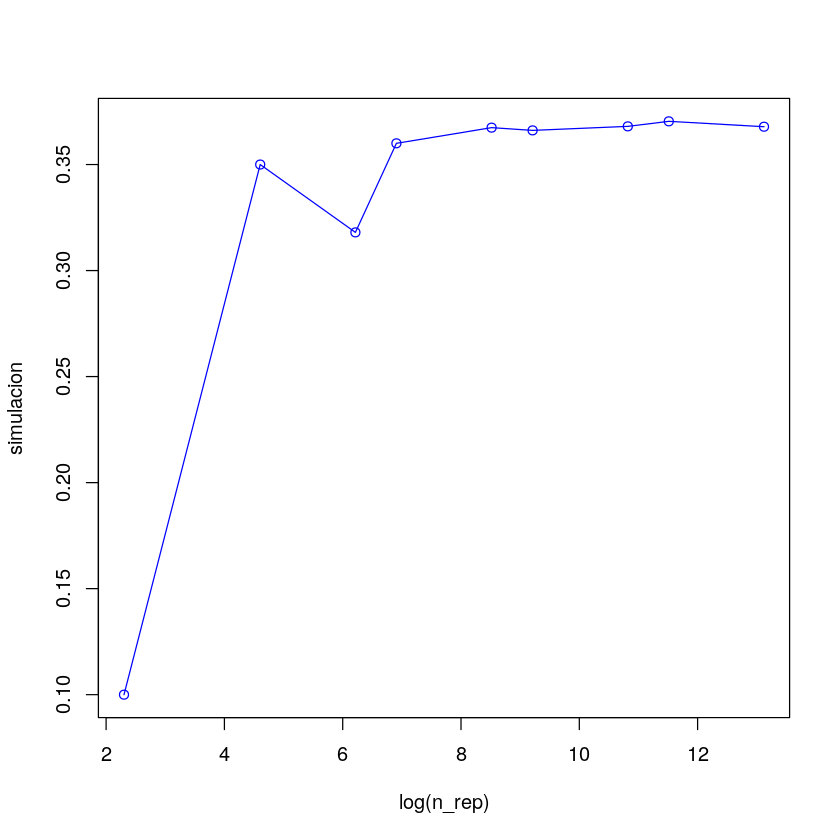

In [9]:
plot(log(n_rep), simulacion, type = 'o', col = 'blue')

¿Qué pasa si cambiamos $n$?

In [35]:
set.seed(1234)

n = 4:1000
n_rep = 10000

simulacion <- rep(NA, length(n))

for (i in 1:length(n))
{
    simulacion[i] <- (mean(replicate(n_rep,fixed_points(sample(1:n[i]))==0)))
}


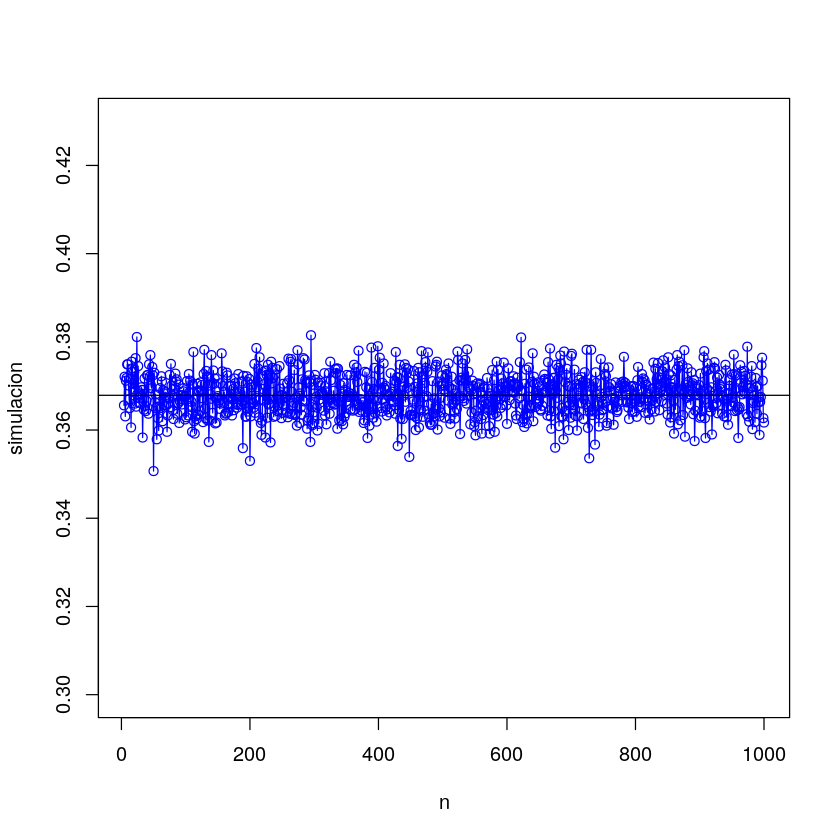

In [40]:
plot(n, simulacion, type = 'o', col = 'blue', ylim = c(0.3,0.43))
abline(h=1/exp(1))

## Derangements

Un **derangement** es una permutación de $n$ elementos de modo que ninguno queda en el mismo lugar.

La cantidad de **derangements** de $n$ elementos (denotado por $!n$) es: $$!n\simeq \dfrac{n!}{e}$$

Luego, la probabiidad de que dada una permutación de $n$ elementos, ninguno quede en el mismo lugar es:
$$\frac{!n}{n!}\simeq \frac{1}{e}$$

In [137]:
1/exp(1)

[1] 0.3678794

Acá pueden encontrar una explicación divertida de este tema por el genio de **Numberphile**

https://www.youtube.com/watch?v=pbXg5EI5t4c}

https://www.youtube.com/watch?v=qYAWjIVY7Zw